In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/creditcardfraud'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

## EDA & Pre-Processing

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


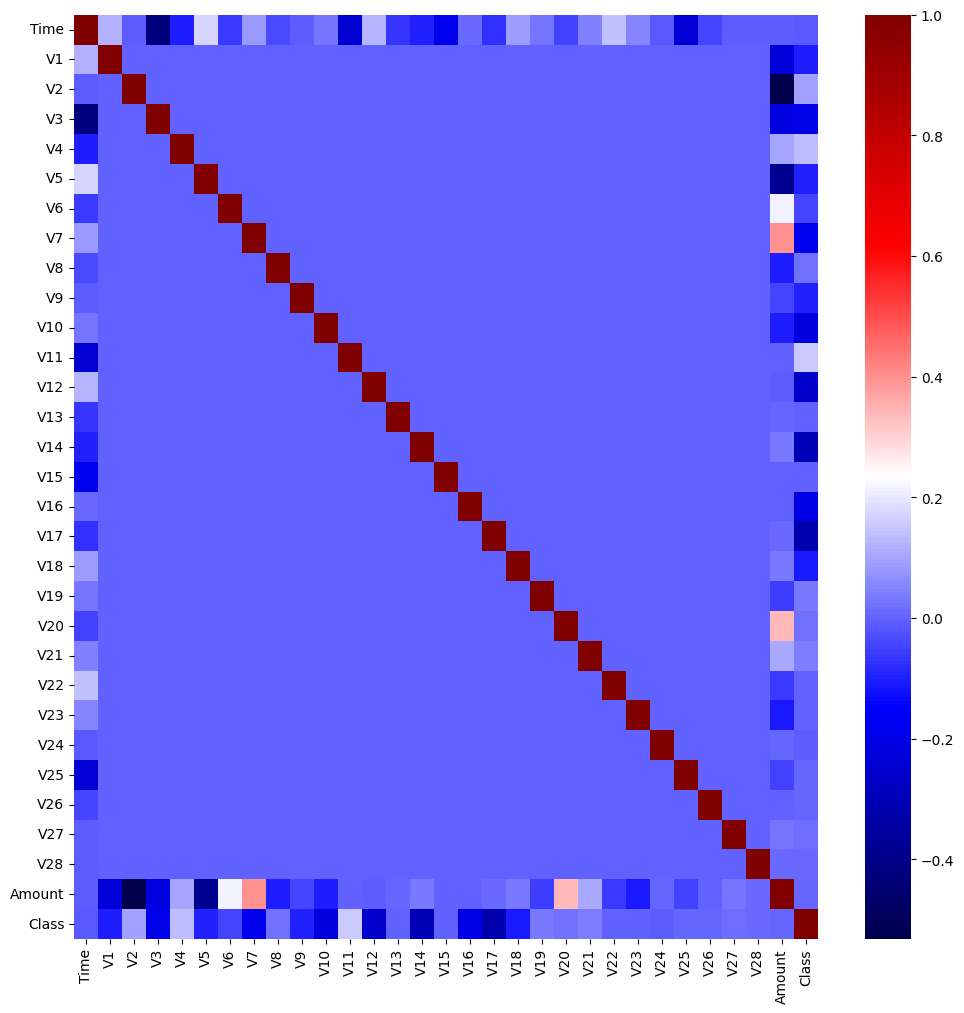

In [9]:
# Heatmap to find any high correlations among the columns
df_corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, cmap="seismic")
plt.show();
# This is the heatmap with the correlations for the imbalanced dataframe. 

In [10]:
# Defining the fraud and normal transactions
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [11]:
# Creating a subset of the normal transactions df
# With the same dimensions as that of the fraud transactions

normal = normal.sample(fraud.shape[0])
normal.shape

(492, 31)

In [12]:
# And then merging them both together, hence we get a balanced dataframe to work with

df2 = pd.concat([fraud, normal], ignore_index = True)
df2.shape

(984, 31)

In [13]:
# Checing the distribution of normal and fraud in df2
fraud_new = df2[df2['Class'] == 1]
normal_new = df2[df2['Class'] == 0]
print(fraud_new.shape)
print(normal_new.shape)

(492, 31)
(492, 31)


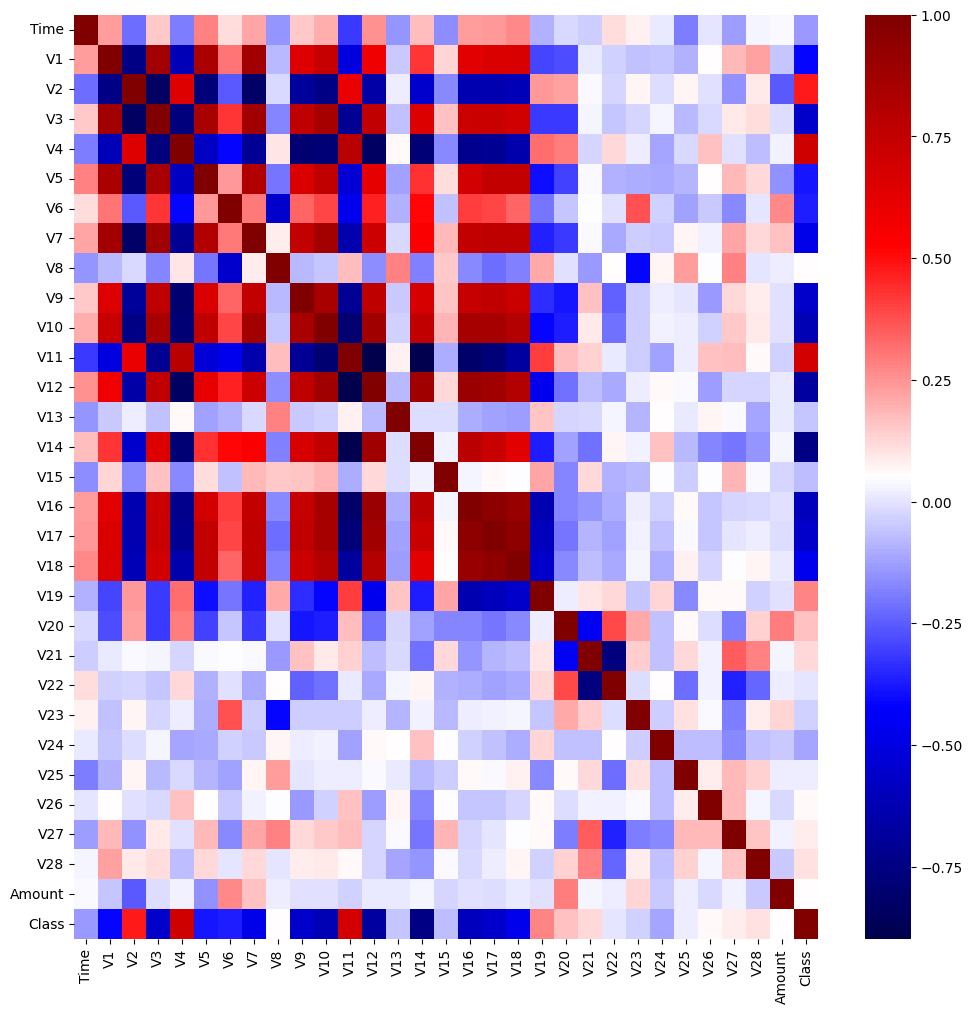

In [14]:
# Now again finding out any high correlations between the columns by using heatmap
df2_corr = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(df2_corr, cmap="seismic")
plt.show();
# This is the heatmap for the balanced df

## Splitting the data 

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into features(X) and traget variable(y)
X = df2.drop('Class', axis=1)
y = df2.Class

#Now splitting X and y into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

## Model Building

### Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [20]:
model1 = GaussianNB()
model1.fit(X_train, y_train)
pred_gaunb = model1.predict(X_test)
print(pred_gaunb)

[0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0]


In [21]:
acc_1 = accuracy_score(y_test, pred_gaunb)
print("The accuracy is {}".format(acc_1))

prec_1 = precision_score(y_test, pred_gaunb)
print("The precision is {}".format(prec_1))

f1_gnb = f1_score(y_test, pred_gaunb)
print("The F1-Score is {}".format(f1_gnb))

The accuracy is 0.8716216216216216
The precision is 0.9912280701754386
The F1-Score is 0.8560606060606061


### Linear & Logistic Regression

In [22]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Logistic Regression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score

# Assuming you have your test dataset loaded as X_test (features) and y_test (true labels)

# Linear Regression doesn't have a concept of accuracy as it's a regression algorithm

# Logistic Regression
logistic_reg_accuracy = logistic_reg.score(X_test, y_test)

# Print accuracies
print("Logistic Regression Accuracy:", logistic_reg_accuracy)


Logistic Regression Accuracy: 0.9324324324324325


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Decision Tree
decision_tree_accuracy = decision_tree_model.score(X_test, y_test)

# Print accuracies
print("Decision Tree Accuracy:", decision_tree_accuracy)

Decision Tree Accuracy: 0.902027027027027


### Support Vector Machine (SVM)

In [27]:
from sklearn.svm import SVC

# SVM (Support Vector Machine)
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [28]:
svc_accuracy = svm_model.score(X_test, y_test)
print("Support Vector Classifier Accuracy:", svc_accuracy)

Support Vector Classifier Accuracy: 0.5


### KNN Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn_accuracy = knn_model.score(X_test, y_test)
print("KNN Classifier Accuracy:", knn_accuracy)

KNN Classifier Accuracy: 0.6013513513513513


### KMeans

In [33]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 2)
kmeans_model.fit(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [35]:
# K-Means doesn't have a concept of accuracy as it's an unsupervised clustering algorithm

kmeans_accuracy = kmeans_model.score(X_test, y_test)
print("KMeans Accuracy:", kmeans_accuracy)

KMeans Accuracy: -169843169202.59424


### Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Random Forest
random_forest_accuracy = random_forest_model.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", random_forest_accuracy)

Random Forest Classifier Accuracy: 0.9324324324324325


### Gradient Boosting Algorithm

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
# Gradient Boosting
gradient_boosting_accuracy = gradient_boosting_model.score(X_test, y_test)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)

Gradient Boosting Accuracy: 0.9290540540540541


### ADA Boost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier()

In [42]:
# AdaBoost
adaboost_accuracy = adaboost_model.score(X_test, y_test)
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.9290540540540541


# Thats it for this one!!!